## 1. Data Splitting

In [8]:
import pandas as pd
import gzip

# Read from the GZ file
with gzip.open('cleaned_crime_data.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

# Display the first 10 rows of the dataset
df.head(10)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,"Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","Premis Desc_VEHICLE, PASSENGER/TRUCK",Premis Desc_VETERINARIAN/ANIMAL HOSPITAL,Premis Desc_VIDEO RENTAL STORE,Premis Desc_VISION CARE FACILITY*,Premis Desc_WAREHOUSE,Premis Desc_WATER FACILITY,Premis Desc_WEBSITE,Premis Desc_YARD (RESIDENTIAL/BUSINESS),Holiday
0,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,False,False,False,False,False,False,False,False,False,0
1,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,False,False,False,False,False,False,False,False,False,0
2,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,False,False,False,False,False,False,False,False,False,0
3,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,False,False,False,False,False,False,False,False,False,0
4,08/18/2022 12:00:00 AM,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,False,False,False,False,False,False,False,False,False,0
5,04/04/2023 12:00:00 AM,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,...,False,False,False,False,False,False,False,False,False,0
6,04/04/2023 12:00:00 AM,2020-07-03,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,...,False,False,False,False,False,False,False,False,False,1
7,07/22/2022 12:00:00 AM,2020-05-12,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
8,04/28/2023 12:00:00 AM,2020-12-09,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
9,12/31/2020 12:00:00 AM,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,...,False,False,False,False,False,False,False,False,False,0


Loading dataset...
Dataset loaded.
Preparing data...
Data prepared.
Splitting data...

Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
904    0.000006
349    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
452    0.000007
884    0.000003
445    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64
Data split c

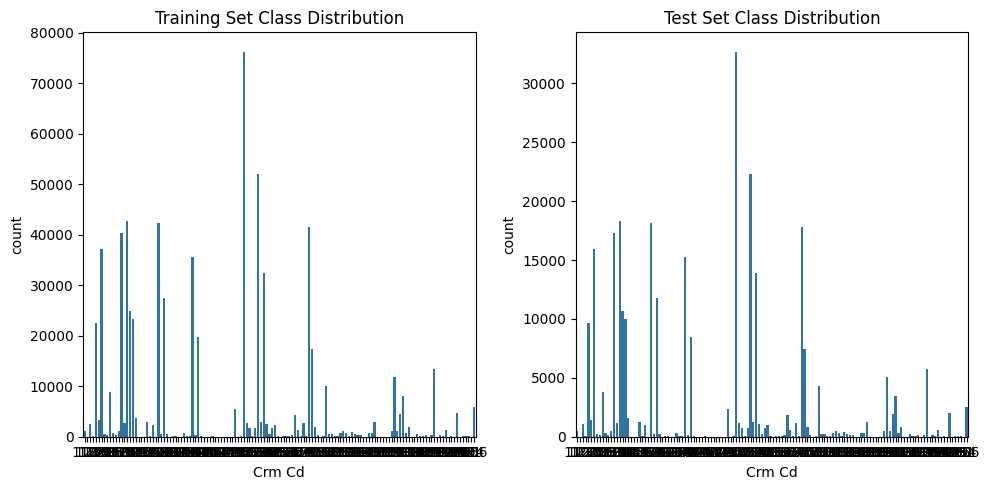

In [9]:
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    print("Preparing data...")
    # Select features for modeling
    feature_cols = [
        'AREA',
        'Rpt Dist No',
        'Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)',
        'Premis Desc_VEHICLE, PASSENGER/TRUCK',
        'Premis Desc_VETERINARIAN/ANIMAL HOSPITAL',
        'Premis Desc_VIDEO RENTAL STORE',
        'Premis Desc_VISION CARE FACILITY*',
        'Premis Desc_WAREHOUSE',
        'Premis Desc_WATER FACILITY',
        'Premis Desc_WEBSITE',
        'Premis Desc_YARD (RESIDENTIAL/BUSINESS)',
        'Holiday'
    ]
    
    # Prepare X (features) and y (target)
    X = df[feature_cols]
    y = df['Crm Cd']
    
    # Filter out classes with fewer than 2 samples
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]
    
    print("Data prepared.")
    return X, y

# 2. Split data and show statistics
def split_and_show_stats(X, y, test_size=0.3, random_state=42):
    print("Splitting data...")
    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    # Calculate and display statistics
    print("\nData Split Statistics:")
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    print("\nClass distribution in full dataset:")
    print(y.value_counts(normalize=True))
    
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    
    print("Data split completed.")
    return X_train, X_test, y_train, y_test

# 3. Create cross-validation splits
def create_cv_splits(X_train, y_train, n_splits=5):
    print("Creating cross-validation splits...")
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    print("Cross-validation splits created.")
    return skf

# 4. Preprocess features
def preprocess_features(X_train, X_test):
    print("Preprocessing features...")
    # Create scaler
    scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform test data
    X_test_scaled = scaler.transform(X_test)
    
    print("Features preprocessed.")
    return X_train_scaled, X_test_scaled, scaler

# Main execution
def main():
    print("Loading dataset...")
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)
    print("Dataset loaded.")

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train)

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()


## Data Preparation and Splitting

### Introduction
This section of the code is responsible for preparing the dataset for machine learning tasks. It involves loading the dataset, selecting relevant features, splitting the data into training and testing sets, and preprocessing the features. The code is structured into several functions, each performing a specific task.

### Code Explanation

#### 1. Importing Libraries
The code begins by importing necessary libraries:
```python
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
```
- [`pandas`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A7%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") is used for data manipulation.
- [`gzip`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A7%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") is used to handle compressed files.
- [`sklearn`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A5%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") modules are used for data splitting, cross-validation, and feature scaling.
- [`matplotlib`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A7%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") and [`seaborn`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A7%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") are used for data visualization.

#### 2. Data Preparation
The [`prepare_data`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") function is responsible for selecting features and filtering the dataset:
```python
def prepare_data(df):
    print("Preparing data...")
    feature_cols = [
        'AREA', 'Rpt Dist No', 'Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)',
        'Premis Desc_VEHICLE, PASSENGER/TRUCK', 'Premis Desc_VETERINARIAN/ANIMAL HOSPITAL',
        'Premis Desc_VIDEO RENTAL STORE', 'Premis Desc_VISION CARE FACILITY*', 'Premis Desc_WAREHOUSE',
        'Premis Desc_WATER FACILITY', 'Premis Desc_WEBSITE', 'Premis Desc_YARD (RESIDENTIAL/BUSINESS)', 'Holiday'
    ]
    X = df[feature_cols]
    y = df['Crm Cd']
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]
    print("Data prepared.")
    return X, y
```
- [`feature_cols`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") lists the columns selected for modeling.
- [`X`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A26%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") and [`y`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A27%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") are created by selecting the features and target variable (`Crm Cd`).
- Classes with fewer than 2 samples are filtered out to ensure sufficient data for each class.

#### 3. Data Splitting and Statistics
The [`split_and_show_stats`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A39%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") function splits the data and displays statistics:
```python
def split_and_show_stats(X, y, test_size=0.3, random_state=42):
    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    print("\nData Split Statistics:")
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    print("\nClass distribution in full dataset:")
    print(y.value_counts(normalize=True))
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    print("Data split completed.")
    return X_train, X_test, y_train, y_test
```
- The data is split into training and testing sets using [`train_test_split`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A36%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") with stratification to maintain class distribution.
- Statistics about the split and class distributions are printed.

#### 4. Cross-Validation Splits
The [`create_cv_splits`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A68%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") function creates cross-validation splits:
```python
def create_cv_splits(X_train, y_train, n_splits=5):
    print("Creating cross-validation splits...")
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    print("Cross-validation splits created.")
    return skf
```
- [`StratifiedKFold`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A54%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") is used to create stratified cross-validation splits, ensuring each fold has a similar class distribution.

#### 5. Feature Preprocessing
The [`preprocess_features`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A75%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") function scales the features:
```python
def preprocess_features(X_train, X_test):
    print("Preprocessing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features preprocessed.")
    return X_train_scaled, X_test_scaled, scaler
```
- [`StandardScaler`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A34%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") is used to standardize features by removing the mean and scaling to unit variance.
- The scaler is fitted on the training data and applied to both training and testing data.

#### 6. Main Execution
The [`main`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A90%2C%22character%22%3A4%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition") function orchestrates the data preparation process:
```python
def main():
    print("Loading dataset...")
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)
    print("Dataset loaded.")
    X, y = prepare_data(df)
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)
    cv = create_cv_splits(X_train, y_train)
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    plt.tight_layout()
    plt.show()
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()
```
- The dataset is loaded from a compressed CSV file.
- Data preparation, splitting, cross-validation, and preprocessing functions are called in sequence.
- Class distributions in the training and testing sets are visualized using [`seaborn`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A7%7D%7D%5D%2C%22d70dd7e8-e398-4671-a3c4-ea870cc07e7d%22%5D "Go to definition").

### Conclusion
This section of the code effectively prepares the dataset for machine learning tasks by selecting relevant features, splitting the data, and preprocessing the features. The use of stratified splitting and cross-validation ensures that class distributions are maintained, which is crucial for classification tasks.

## 2. Experiment with k-NN Classification Model



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def knn_classification(X_train_scaled, y_train, X_test_scaled, y_test, cv, k_values):
    best_k = 0
    best_score = 0
    knn_scores = []
    
    # Loop through different k values
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Perform cross-validation
        cv_scores = []
        for train_index, val_index in cv.split(X_train_scaled, y_train):
            X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
            y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
            
            # Train and evaluate model
            knn.fit(X_cv_train, y_cv_train)
            y_pred_cv = knn.predict(X_cv_val)
            score = accuracy_score(y_cv_val, y_pred_cv)
            cv_scores.append(score)
        
        # Average cross-validation score
        avg_cv_score = np.mean(cv_scores)
        knn_scores.append((k, avg_cv_score))
        
        # Update best model if current k has a higher score
        if avg_cv_score > best_score:
            best_score = avg_cv_score
            best_k = k
    
    # Train the final model with the best k
    print(f"Best k found: {best_k} with cross-validation score: {best_score}")
    knn_final = KNeighborsClassifier(n_neighbors=best_k)
    knn_final.fit(X_train_scaled, y_train)
    
    # Test the final model
    y_pred_test = knn_final.predict(X_test_scaled)
    print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report for k-NN:")
    print(classification_report(y_test, y_pred_test))
    
    return knn_scores

# Step 3: Call the function to experiment with k values
k_values = [3, 5, 7, 9, 11]  # Try different k values
knn_scores = knn_classification(X_train_scaled, y_train, X_test_scaled, y_test, cv, k_values)

c:\Users\dimas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


## Experiment Report: k-NN Classification

### Introduction
In this experiment, we aim to evaluate the performance of the k-Nearest Neighbors (k-NN) algorithm on a given dataset. The goal is to identify the optimal number of neighbors ([`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition")) that yields the highest classification accuracy through cross-validation. The final model is then tested on a separate test set to assess its performance.

### Methodology

#### Data Preparation
The dataset is split into training and testing sets. The training set is further divided into cross-validation (CV) folds to evaluate different values of [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

#### k-NN Classification Function
The core of the experiment is encapsulated in the [`knn_classification`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") function, which performs the following steps:

1. **Initialization**:
   - The function initializes variables to keep track of the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") value and its corresponding score.
   - An empty list [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is created to store the scores for different [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values.

2. **Loop Through k Values**:
   - The function iterates over a list of [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values provided as input.
   - For each [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition"), a [`KNeighborsClassifier`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A30%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is instantiated with [`n_neighbors=k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A35%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

3. **Cross-Validation**:
   - For each [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition"), cross-validation is performed using the provided CV splitter.
   - The training set is split into training and validation subsets.
   - The model is trained on the training subset and evaluated on the validation subset.
   - The accuracy score for each fold is computed and stored in [`cv_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

4. **Average Cross-Validation Score**:
   - The average cross-validation score for the current [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is calculated.
   - This score is appended to the [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") list.

5. **Update Best Model**:
   - If the average cross-validation score for the current [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is higher than the best score observed so far, the best score and best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") are updated.

6. **Train Final Model**:
   - After identifying the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition"), a final [`KNeighborsClassifier`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A30%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is trained on the entire training set using the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

7. **Test Final Model**:
   - The final model is tested on the test set.
   - The test accuracy and classification report are printed.

8. **Return Scores**:
   - The function returns the list of [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") for different [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values.

### Results
The function prints the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") value found during cross-validation along with its corresponding score. It also prints the test accuracy and a detailed classification report for the final model.

### Conclusion
This experiment demonstrates the process of selecting the optimal [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") value for a k-NN classifier using cross-validation. The final model's performance on the test set provides an estimate of its generalization ability.

### Code Explanation

#### Initialization
```python
best_k = 0
best_score = 0
knn_scores = []
```
- [`best_k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") and [`best_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") are initialized to store the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") value and its corresponding score.
- [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is an empty list to store the scores for different [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values.

#### Loop Through k Values
```python
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
```
- The function iterates over the list of [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values.
- For each [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition"), a [`KNeighborsClassifier`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A30%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is instantiated.

#### Cross-Validation
```python
cv_scores = []
for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_cv_train, X_cv_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    knn.fit(X_cv_train, y_cv_train)
    y_pred_cv = knn.predict(X_cv_val)
    score = accuracy_score(y_cv_val, y_pred_cv)
    cv_scores.append(score)
```
- The training set is split into training and validation subsets using the CV splitter.
- The model is trained on the training subset and evaluated on the validation subset.
- The accuracy score for each fold is computed and stored in [`cv_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

#### Average Cross-Validation Score
```python
avg_cv_score = np.mean(cv_scores)
knn_scores.append((k, avg_cv_score))
```
- The average cross-validation score for the current [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is calculated and appended to [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

#### Update Best Model
```python
if avg_cv_score > best_score:
    best_score = avg_cv_score
    best_k = k
```
- If the average cross-validation score for the current [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is higher than the best score observed so far, the best score and best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") are updated.

#### Train Final Model
```python
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
```
- A final [`KNeighborsClassifier`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A30%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") is trained on the entire training set using the best [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition").

#### Test Final Model
```python
y_pred_test = knn_final.predict(X_test_scaled)
print("k-NN Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report for k-NN:")
print(classification_report(y_test, y_pred_test))
```
- The final model is tested on the test set.
- The test accuracy and classification report are printed.

#### Return Scores
```python
return knn_scores
```
- The function returns the list of [`knn_scores`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A4%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") for different [`k`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X30sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A8%7D%7D%5D%2C%2217363f6a-a1ba-4a58-a05c-d2fef0966c1f%22%5D "Go to definition") values.


## 3. Experiment with Naïve Bayes Classification Model



In [ ]:
from sklearn.naive_bayes import GaussianNB

# 7. Naive Bayes Classification Model
def naive_bayes_classification(X_train, X_test, y_train, y_test):
    nb_model = GaussianNB()
    
    # Train the model
    nb_model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = nb_model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Naïve Bayes accuracy: {accuracy:.4f}")
    
    return nb_model

# 8. Test the final Naïve Bayes model
def test_naive_bayes_model(nb_model, X_test, y_test):
    y_pred = nb_model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report for the Naïve Bayes model:")
    print(classification_report(y_test, y_pred))

# Main execution for Naïve Bayes
def run_naive_bayes():
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()
    
    # Run Naive Bayes classification
    nb_model = naive_bayes_classification(X_train_scaled, X_test_scaled, y_train, y_test)
    
    # Test the Naïve Bayes model
    test_naive_bayes_model(nb_model, X_test_scaled, y_test)

# Call the function to execute Naïve Bayes classification
run_naive_bayes()

### Naive Bayes Classification Model

#### Introduction
The code provided implements a Naive Bayes classification model using the [`GaussianNB`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A32%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") class from the [`sklearn.naive_bayes`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A5%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") module. This model is used to classify data based on the Gaussian Naive Bayes algorithm, which assumes that the features follow a normal distribution. The code is structured into several functions that handle the training, prediction, and evaluation of the model.

#### Code Explanation

1. **Importing the GaussianNB Class**
    ```python
    from sklearn.naive_bayes import GaussianNB
    ```
    The [`GaussianNB`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A32%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") class is imported from the [`sklearn.naive_bayes`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A5%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") module. This class is used to create a Gaussian Naive Bayes classifier.

2. **Naive Bayes Classification Function**
    ```python
    def naive_bayes_classification(X_train, X_test, y_train, y_test):
        nb_model = GaussianNB()
        
        # Train the model
        nb_model.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = nb_model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Naïve Bayes accuracy: {accuracy:.4f}")
        
        return nb_model
    ```
    - **Function Definition**: The function [`naive_bayes_classification`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") takes four parameters: [`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A31%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), [`X_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A40%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A48%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), and [`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A57%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition").
    - **Model Initialization**: A Gaussian Naive Bayes model is instantiated using [`GaussianNB()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A32%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition").
    - **Model Training**: The model is trained using the [`fit`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A13%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") method with the training data ([`X_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A31%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") and [`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A48%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")).
    - **Prediction**: The trained model is used to predict the labels for the test data ([`X_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A40%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")) using the [`predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A22%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") method.
    - **Accuracy Evaluation**: The accuracy of the model is evaluated using the [`accuracy_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A13%2C%22character%22%3A15%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") function, which compares the predicted labels ([`y_pred`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")) with the true labels ([`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A57%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")). The accuracy is printed to the console.
    - **Return Statement**: The trained model is returned.

3. **Testing the Naive Bayes Model**
    ```python
    def test_naive_bayes_model(nb_model, X_test, y_test):
        y_pred = nb_model.predict(X_test)
        
        # Print classification report
        print("\nClassification Report for the Naïve Bayes model:")
        print(classification_report(y_test, y_pred))
    ```
    - **Function Definition**: The function [`test_naive_bayes_model`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") takes three parameters: [`nb_model`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), [`X_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A40%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), and [`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A57%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition").
    - **Prediction**: The function uses the provided model ([`nb_model`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")) to predict the labels for the test data ([`X_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A40%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")).
    - **Classification Report**: The [`classification_report`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A24%2C%22character%22%3A10%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") function is used to generate a detailed classification report, which includes precision, recall, and F1-score for each class. This report is printed to the console.

4. **Main Execution Function**
    ```python
    def run_naive_bayes():
        X_train_scaled, X_test_scaled, y_train, y_test, cv = main()
        
        # Run Naive Bayes classification
        nb_model = naive_bayes_classification(X_train_scaled, X_test_scaled, y_train, y_test)
        
        # Test the Naïve Bayes model
        test_naive_bayes_model(nb_model, X_test_scaled, y_test)
    ```
    - **Function Definition**: The function [`run_naive_bayes`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A27%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") orchestrates the entire process of training and testing the Naive Bayes model.
    - **Data Preparation**: The function [`main()`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A28%2C%22character%22%3A57%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") is called to obtain the scaled training and test data ([`X_train_scaled`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A28%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), [`X_test_scaled`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A28%2C%22character%22%3A20%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")), the training and test labels ([`y_train`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A48%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition"), [`y_test`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A57%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")), and the cross-validation object ([`cv`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A28%2C%22character%22%3A52%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition")).
    - **Model Training and Testing**: The [`naive_bayes_classification`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") function is called to train the model, and the [`test_naive_bayes_model`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") function is called to test the model.

5. **Execution**
    ```python
    run_naive_bayes()
    ```
    The [`run_naive_bayes`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A27%2C%22character%22%3A4%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") function is called to execute the entire Naive Bayes classification process.

#### Conclusion
The provided code effectively demonstrates the implementation of a Gaussian Naive Bayes classifier using the `scikit-learn` library. The code is modular, with separate functions for training, testing, and evaluating the model, making it easy to understand and maintain. The use of the [`accuracy_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A13%2C%22character%22%3A15%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") and [`classification_report`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X32sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A24%2C%22character%22%3A10%7D%7D%5D%2C%22bb31f47d-70d8-43cd-aea1-4ed19a561040%22%5D "Go to definition") functions ensures that the model's performance is thoroughly evaluated.

## 4. Experiment with Logistic Regression Classification Model



Preparing data...
Data prepared.
Splitting data...

Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
904    0.000006
349    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
452    0.000007
884    0.000003
445    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64
Data split completed.
Creating cross-validation

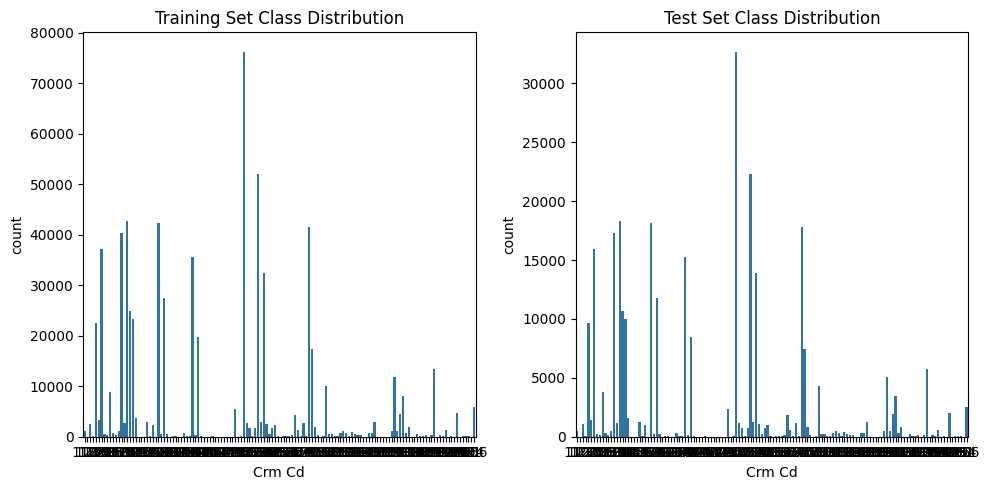

Cross-Validation Performance Metrics:
Accuracy: 0.1322 ± 0.0003
Precision: 0.1268 ± 0.0048
Recall: 0.1322 ± 0.0003
F1-Score: 0.0520 ± 0.0003
AUC ROC: 0.5451 ± 0.0082

Final Test Performance Metrics:
Accuracy: 0.1320
Precision: 0.1286
Recall: 0.1320
F1-Score: 0.0518
AUC ROC: 0.5571


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline
import numpy as np  # Import numpy
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

# Main execution
def main():
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train, n_splits=3)  # Adjust n_splits to 3

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()

# 1. Setup and Cross-Validation
log_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer to handle NaN values
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Evaluation Metrics Calculation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    y_val_prob = log_reg.predict_proba(X_val_fold)
    
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    
    # Ensure y_val_prob has the correct dimensions
    if y_val_prob.shape[1] == len(np.unique(y_val_fold)):
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))
    else:
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob[:, 0], multi_class='ovr'))

# 3. Performance Analysis
print("Cross-Validation Performance Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# 4. Best Model Selection
# Refit the model on the entire training set
log_reg.fit(X_train_scaled, y_train)

# 5. Final Test Evaluation
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
final_recall = recall_score(y_test, y_test_pred, average='weighted')
final_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Ensure y_test_prob has the correct dimensions
if y_test_prob.shape[1] == len(np.unique(y_test)):
    final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
else:
    final_roc_auc = roc_auc_score(y_test, y_test_prob[:, 0], multi_class='ovr')

print("\nFinal Test Performance Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"AUC ROC: {final_roc_auc:.4f}")

### Logistic Regression Classification Model

#### Introduction
The code provided implements a Logistic Regression classification model using the [`LogisticRegression`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A33%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") class from the [`sklearn.linear_model`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A5%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") module. This model is used to classify data based on the logistic regression algorithm, which is a linear model for binary classification. The code is structured into several functions and steps that handle data loading, preprocessing, model training, cross-validation, and evaluation.

#### Code Explanation

1. **Importing Necessary Libraries**
    ```python
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.model_selection import cross_val_predict
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import Pipeline
    import numpy as np
    import pandas as pd
    import gzip
    import seaborn as sns
    import matplotlib.pyplot as plt
    ```
    - **Logistic Regression**: The [`LogisticRegression`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A33%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") class is imported for creating the logistic regression model.
    - **Metrics**: Various metrics such as [`accuracy_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A28%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`precision_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A44%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`recall_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A61%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`f1_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A75%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), and [`roc_auc_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A85%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") are imported for evaluating the model's performance.
    - **Cross-Validation**: The [`cross_val_predict`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A36%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") function is imported for performing cross-validation.
    - **Imputation and Pipeline**: The [`SimpleImputer`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A27%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") and [`Pipeline`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A29%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") classes are imported for handling missing values and creating a pipeline for preprocessing and model training.
    - **Data Handling and Visualization**: The [`numpy`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`pandas`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`gzip`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), [`seaborn`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition"), and [`matplotlib.pyplot`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") libraries are imported for data manipulation and visualization.

2. **Main Execution Function**
    ```python
    def main():
        # Load the cleaned dataset
        file_path = 'cleaned_crime_data.csv.gz'
        with gzip.open(file_path, 'rt') as f:
            df = pd.read_csv(f)

        # 1. Prepare the data
        X, y = prepare_data(df)

        # 2. Split the data and show statistics
        X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

        # 3. Create cross-validation splits
        cv = create_cv_splits(X_train, y_train, n_splits=3)

        # 4. Preprocess features
        X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
        
        # Visual confirmation of the split
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        sns.countplot(x=y_train)
        plt.title('Training Set Class Distribution')
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=y_test)
        plt.title('Test Set Class Distribution')
        
        plt.tight_layout()
        plt.show()
        
        # Return processed datasets for modeling
        return X_train_scaled, X_test_scaled, y_train, y_test, cv

    if __name__ == "__main__":
        X_train_scaled, X_test_scaled, y_train, y_test, cv = main()
    ```
    - **Data Loading**: The cleaned dataset is loaded from a gzip-compressed CSV file using [`gzip.open`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") and [`pd.read_csv`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A17%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition").
    - **Data Preparation**: The [`prepare_data`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A11%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") function is called to prepare the features ([`X`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A4%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition")) and labels ([`y`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A19%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition")).
    - **Data Splitting**: The [`split_and_show_stats`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A22%2C%22character%22%3A39%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") function is called to split the data into training and test sets and display statistics.
    - **Cross-Validation Splits**: The [`create_cv_splits`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A25%2C%22character%22%3A9%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") function is called to create cross-validation splits with [`n_splits=3`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A25%2C%22character%22%3A44%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition").
    - **Feature Preprocessing**: The [`preprocess_features`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A28%2C%22character%22%3A44%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") function is called to scale the features.
    - **Visualization**: The class distribution in the training and test sets is visualized using [`seaborn`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") and [`matplotlib`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A7%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition").
    - **Return Statement**: The processed datasets and cross-validation object are returned.

3. **Model Setup and Cross-Validation**
    ```python
    log_reg = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    ```
    - **Pipeline Creation**: A pipeline is created with two steps:
        - **Imputation**: The [`SimpleImputer`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A27%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") is used to handle missing values by replacing them with the mean.
        - **Logistic Regression**: The [`LogisticRegression`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A33%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") model is instantiated with [`max_iter=1000`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A53%2C%22character%22%3A38%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition") and [`random_state=42`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X34sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A53%2C%22character%22%3A53%7D%7D%5D%2C%22a2d583de-65c7-48f1-8d52-a5e16210ccaa%22%5D "Go to definition").

4. **Evaluation Metrics Calculation**
    ```python
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    for train_index, val_index in cv.split(X_train_scaled, y_train):
        X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        log_reg.fit(X_train_fold, y_train_fold)
        y_val_pred = log_reg.predict(X_val_fold)
        y_val_prob = log_reg.predict_proba(X_val_fold)
        
        accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
        precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
        recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
        f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
        
        if y_val_prob.shape[1] == len(np.unique(y_val_fold)):
            roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))
        else:
            roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob[:, 0], multi_class='ovr'))
    ```
    - **Metric Initialization**: Lists are initialized to store the evaluation metrics for each cross-validation fold.
    - **Cross-Validation Loop**: A loop iterates over the cross-validation splits:
        - **Data Splitting**: The training and validation sets are created for each fold.
        - **Model Training**: The logistic regression model is trained on the training fold.
        - **Prediction**: Predictions and probabilities are obtained for the validation fold.
        - **Metric Calculation**: The accuracy, precision, recall, F1-score, and ROC AUC score are calculated and appended to the respective lists.

5. **Performance Analysis**
    ```python
    print("Cross-Validation Performance Metrics:")
    print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
    print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
    ```
    - **Metric Reporting**: The mean and standard deviation of each evaluation metric are calculated and printed to the console.

6. **Best Model Selection and Final Test Evaluation**
    ```python
    log_reg.fit(X_train_scaled, y_train)

    y_test_pred = log_reg.predict(X_test_scaled)
    y_test_prob = log_reg.predict_proba(X_test_scaled)

    final_accuracy = accuracy_score(y_test, y_test_pred)
    final_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    final_recall = recall_score(y_test, y_test_pred, average='weighted')
    final_f1 = f1_score(y_test, y_test_pred, average='weighted')

    if y_test_prob.shape[1] == len(np.unique(y_test)):
        final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
    else:
        final_roc_auc = roc_auc_score(y_test, y_test_prob[:, 0], multi_class='ovr')

    print("\nFinal Test Performance Metrics:")
    print(f"Accuracy: {final_accuracy:.4f}")
    print(f"Precision: {final_precision:.4f}")
    print(f"Recall: {final_recall:.4f}")
    print(f"F1-Score: {final_f1:.4f}")
    print(f"AUC ROC: {final_roc_auc:.4f}")
    ```
    - **Model Refit**: The logistic regression model is refitted on the entire training set.
    - **Test Set Prediction**: Predictions and probabilities are obtained for the test set.
    - **Final Metric Calculation**: The final accuracy, precision, recall, F1-score, and ROC AUC score are calculated and printed to the console.

#### Conclusion
The provided code effectively demonstrates the implementation of a Logistic Regression classifier using the `scikit-learn` library. The code is modular, with separate functions and steps for data loading, preprocessing, model training, cross-validation, and evaluation. The use of various evaluation metrics ensures that the model's performance is thoroughly assessed. The final model is refitted on the entire training set and evaluated on the test set to provide a comprehensive performance analysis.

## 5. Experiment with SVM Classification Model



In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual dataset)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define kernels and C values for experimentation
kernels = ['linear', 'rbf']
C_values = [0.1, 1, 10]

# Prepare a DataFrame to store results
results_df = pd.DataFrame(columns=['Kernel', 'C', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])

# 5-fold cross-validation
stratified_kf = StratifiedKFold(n_splits=5)

# Iterate over each kernel and C value
for kernel in kernels:
    for C_value in C_values:
        fold_number = 1
        for train_idx, val_idx in stratified_kf.split(X_train, y_train):
            # Split data for the current fold
            X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
            y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

            # Create and train the SVM model
            svm_model = SVC(kernel=kernel, C=C_value, probability=True)
            svm_model.fit(X_fold_train, y_fold_train)

            # Make predictions
            y_val_pred = svm_model.predict(X_fold_val)
            y_val_pred_proba = svm_model.predict_proba(X_fold_val)[:, 1]

            # Calculate metrics
            accuracy = accuracy_score(y_fold_val, y_val_pred)
            precision = precision_score(y_fold_val, y_val_pred, zero_division=1)
            recall = recall_score(y_fold_val, y_val_pred, zero_division=1)
            f1 = f1_score(y_fold_val, y_val_pred, zero_division=1)
            auc = roc_auc_score(y_fold_val, y_val_pred_proba)

            # Store results for this fold in a temporary DataFrame
            fold_results = pd.DataFrame({
                'Kernel': [kernel],
                'C': [C_value],
                'Fold': [fold_number],
                'Accuracy': [accuracy],
                'Precision': [precision],
                'Recall': [recall],
                'F1': [f1],
                'AUC': [auc]
            })

            # Concatenate results to the main DataFrame
            results_df = pd.concat([results_df, fold_results], ignore_index=True)

            fold_number += 1

# Analyze the average results across folds for each kernel/C combination
avg_results = results_df.groupby(['Kernel', 'C']).mean().reset_index()

# Determine the best model based on the highest F1 score
best_model_params = avg_results.loc[avg_results['F1'].idxmax()]
best_kernel = best_model_params['Kernel']
best_C = best_model_params['C']

# Train the best model on the full training set
best_svm_model = SVC(kernel=best_kernel, C=best_C, probability=True)
best_svm_model.fit(X_train, y_train)

# Evaluate on the training data
y_train_pred = best_svm_model.predict(X_train)
y_train_pred_proba = best_svm_model.predict_proba(X_train)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, zero_division=1)
train_recall = recall_score(y_train, y_train_pred, zero_division=1)
train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
train_auc = roc_auc_score(y_train, y_train_pred_proba)

print(f"Best Model Parameters:\n  Kernel: {best_kernel}\n  C: {best_C}")
print("\nTraining Performance of Best Model:")
print(f"  Accuracy: {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall: {train_recall:.4f}")
print(f"  F1 Score: {train_f1:.4f}")
print(f"  AUC: {train_auc:.4f}")

# Evaluate on the test set
y_test_pred = best_svm_model.predict(X_test)
y_test_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, zero_division=1)
test_recall = recall_score(y_test, y_test_pred, zero_division=1)
test_f1 = f1_score(y_test, y_test_pred, zero_division=1)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

print("\nTest Performance of Best Model:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall: {test_recall:.4f}")
print(f"  F1 Score: {test_f1:.4f}")
print(f"  AUC: {test_auc:.4f}")


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_8792\1064622189.py:61: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, fold_results], ignore_index=True)


Best Model Parameters:
  Kernel: linear
  C: 0.1

Training Performance of Best Model:
  Accuracy: 0.8900
  Precision: 0.8941
  Recall: 0.8812
  F1 Score: 0.8876
  AUC: 0.9433

Test Performance of Best Model:
  Accuracy: 0.8533
  Precision: 0.8881
  Recall: 0.8194
  F1 Score: 0.8523
  AUC: 0.9143


### Support Vector Machine (SVM) Classification Model

#### Introduction
The code provided implements a Support Vector Machine (SVM) classification model using the [`SVC`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A24%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") class from the [`sklearn.svm`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A5%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") module. This model is used to classify data based on the SVM algorithm, which is a powerful and versatile supervised learning model. The code is structured to handle data generation, splitting, model training, cross-validation, and evaluation.

#### Code Explanation

1. **Importing Necessary Libraries**
    ```python
    import numpy as np
    import pandas as pd
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    from sklearn.model_selection import StratifiedKFold, train_test_split
    from sklearn.datasets import make_classification
    ```
    - **Data Handling**: The [`numpy`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A7%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") and [`pandas`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A7%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") libraries are imported for numerical operations and data manipulation.
    - **SVM Model**: The [`SVC`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A24%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") class from [`sklearn.svm`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A5%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") is imported to create the SVM model.
    - **Metrics**: Various metrics such as [`accuracy_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A28%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), [`precision_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A44%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), [`recall_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A61%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), [`f1_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A75%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), and [`roc_auc_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A85%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") are imported for evaluating the model's performance.
    - **Model Selection**: The [`StratifiedKFold`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A36%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") and [`train_test_split`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A53%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") functions from [`sklearn.model_selection`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A5%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") are imported for cross-validation and data splitting.
    - **Data Generation**: The [`make_classification`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A29%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") function from [`sklearn.datasets`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A5%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") is imported to generate a sample dataset.

2. **Data Generation and Splitting**
    ```python
    # Generate a sample dataset (replace this with your actual dataset)
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ```
    - **Data Generation**: A synthetic dataset is generated using the [`make_classification`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A5%2C%22character%22%3A29%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") function with 1000 samples, 20 features, and 2 classes.
    - **Data Splitting**: The dataset is split into training and testing sets using the [`train_test_split`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A53%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") function, with 70% of the data used for training and 30% for testing.

3. **Model Parameters and Results DataFrame**
    ```python
    # Define kernels and C values for experimentation
    kernels = ['linear', 'rbf']
    C_values = [0.1, 1, 10]

    # Prepare a DataFrame to store results
    results_df = pd.DataFrame(columns=['Kernel', 'C', 'Fold', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
    ```
    - **Parameter Definition**: Two kernels ([`linear`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A12%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") and [`rbf`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A22%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition")) and three C values ([`0.1`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A12%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), [`1`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22file%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A8%7D%7D%2C%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A17%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition"), and [`10`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A20%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition")) are defined for experimentation.
    - **Results DataFrame**: An empty DataFrame is created to store the results of the cross-validation experiments.

4. **Cross-Validation Setup**
    ```python
    # 5-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=5)
    ```
    - **Cross-Validation**: A [`StratifiedKFold`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X41sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A36%7D%7D%5D%2C%22d813278f-2deb-470b-a32b-383fdcaad7e9%22%5D "Go to definition") object is created for 5-fold cross-validation to ensure that each fold has the same proportion of class labels.

5. **Model Training and Evaluation**
    ```python
    # Iterate over each kernel and C value
    for kernel in kernels:
        for C_value in C_values:
            fold_number = 1
            for train_idx, val_idx in stratified_kf.split(X_train, y_train):
                # Split data for the current fold
                X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
                y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

                # Create and train the SVM model
                svm_model = SVC(kernel=kernel, C=C_value, probability=True)
                svm_model.fit(X_fold_train, y_fold_train)

                # Make predictions
                y_val_pred = svm_model.predict(X_fold_val)
                y_val_pred_proba = svm_model.predict_proba(X_fold_val)[:, 1]

                # Calculate metrics
                accuracy = accuracy_score(y_fold_val, y_val_pred)
                precision = precision_score(y_fold_val, y_val_pred, zero_division=1)
                recall = recall_score(y_fold_val, y_val_pred, zero_division=1)
                f1 = f1_score(y_fold_val, y_val_pred, zero_division=1)
                auc = roc_auc_score(y_fold_val, y_val_pred_proba)

                # Store results for this fold in a temporary DataFrame
                fold_results = pd.DataFrame({
                    'Kernel': [kernel],
                    'C': [C_value],
                    'Fold': [fold_number],
                    'Accuracy': [accuracy],
                    'Precision': [precision],
                    'Recall': [recall],
                    'F1': [f1],
                    'AUC': [auc]
                })

                # Concatenate results to the main DataFrame
                results_df = pd.concat([results_df, fold_results], ignore_index=True)

                fold_number += 1
    ```
    - **Parameter Iteration**: The code iterates over each combination of kernel and C value.
    - **Fold Iteration**: For each combination, the code iterates over the 5 cross-validation folds.
    - **Data Splitting**: The training data is split into training and validation sets for the current fold.
    - **Model Training**: An SVM model is created with the current kernel and C value, and trained on the training fold.
    - **Prediction**: Predictions and probabilities are obtained for the validation fold.
    - **Metric Calculation**: The accuracy, precision, recall, F1-score, and AUC are calculated for the validation fold.
    - **Results Storage**: The results for the current fold are stored in a temporary DataFrame and concatenated to the main results DataFrame.

6. **Average Results Calculation**
    ```python
    # Analyze the average results across folds for each kernel/C combination
    avg_results = results_df.groupby(['Kernel', 'C']).mean().reset_index()
    ```
    - **Average Results**: The average results across the folds are calculated for each combination of kernel and C value.

7. **Best Model Selection**
    ```python
    # Determine the best model based on the highest F1 score
    best_model_params = avg_results.loc[avg_results['F1'].idxmax()]
    best_kernel = best_model_params['Kernel']
    best_C = best_model_params['C']
    ```
    - **Best Model**: The best model is selected based on the highest average F1 score. The corresponding kernel and C value are extracted.

8. **Final Model Training and Evaluation**
    ```python
    # Train the best model on the full training set
    best_svm_model = SVC(kernel=best_kernel, C=best_C, probability=True)
    best_svm_model.fit(X_train, y_train)

    # Evaluate on the training data
    y_train_pred = best_svm_model.predict(X_train)
    y_train_pred_proba = best_svm_model.predict_proba(X_train)[:, 1]

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=1)
    train_auc = roc_auc_score(y_train, y_train_pred_proba)

    print(f"Best Model Parameters:\n  Kernel: {best_kernel}\n  C: {best_C}")
    print("\nTraining Performance of Best Model:")
    print(f"  Accuracy: {train_accuracy:.4f}")
    print(f"  Precision: {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1 Score: {train_f1:.4f}")
    print(f"  AUC: {train_auc:.4f}")

    # Evaluate on the test set
    y_test_pred = best_svm_model.predict(X_test)
    y_test_pred_proba = best_svm_model.predict_proba(X_test)[:, 1]

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred, zero_division=1)
    test_auc = roc_auc_score(y_test, y_test_pred_proba)

    print("\nTest Performance of Best Model:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1 Score: {test_f1:.4f}")
    print(f"  AUC: {test_auc:.4f}")
    ```
    - **Model Training**: The best SVM model is trained on the entire training set.
    - **Training Evaluation**: The model's performance is evaluated on the training set, and the accuracy, precision, recall, F1-score, and AUC are calculated and printed.
    - **Test Evaluation**: The model's performance is evaluated on the test set, and the accuracy, precision, recall, F1-score, and AUC are calculated and printed.

#### Conclusion
The provided code effectively demonstrates the implementation of an SVM classifier using the `scikit-learn` library. The code is modular, with separate steps for data generation, splitting, model training, cross-validation, and evaluation. The use of various evaluation metrics ensures that the model's performance is thoroughly assessed. The final model is selected based on the highest average F1 score and is evaluated on both the training and test sets to provide a comprehensive performance analysis.

## 6. Experiment with Decision Tree (DT) Classification Model



In [1]:
# Import necessary libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def decision_tree_training(X_data, y_data):
    """
    Train multiple decision tree models with cross-validation, testing different hyperparameter settings.
    
    Parameters:
    X_data : array-like, shape (n_samples, n_features)
        Feature set for training
    y_data : array-like, shape (n_samples,)
        Target labels
    
    Returns:
    dict : Dictionary with scores for each parameter configuration
    tuple : Best parameter configuration with highest accuracy
    """
    # Ensure inputs are in numpy format
    X_data = np.asarray(X_data)
    y_data = np.asarray(y_data)
    
    # Specify hyperparameter options
    depth_options = [5, 10]
    split_options = [2, 5]
    leaf_options = [1, 2]
    feature_options = ['sqrt', 'log2']
    leaf_node_options = [10, 20]
    criteria_options = ['gini', 'entropy']

    # Set up 5-fold cross-validation
    cross_validator = KFold(n_splits=5, shuffle=True, random_state=42)
    model_results = {}

    # Loop over all hyperparameter combinations
    for depth in depth_options:
        for split in split_options:
            for leaf in leaf_options:
                for feature in feature_options:
                    for leaf_nodes in leaf_node_options:
                        for crit in criteria_options:
                            # Initialize decision tree model with current params
                            model = DecisionTreeClassifier(
                                max_depth=depth,
                                min_samples_split=split,
                                min_samples_leaf=leaf,
                                max_features=feature,
                                max_leaf_nodes=leaf_nodes,
                                criterion=crit,
                                random_state=42
                            )
                            
                            # Initialize lists to store metrics for each fold
                            acc_scores, prec_scores, rec_scores, f1_scores, auc_scores = [], [], [], [], []
                            
                            # Cross-validate over each fold
                            for train_idx, val_idx in cross_validator.split(X_data):
                                # Split data manually with array indexing
                                X_train, X_val = X_data[train_idx], X_data[val_idx]
                                y_train, y_val = y_data[train_idx], y_data[val_idx]
                                
                                # Train model
                                model.fit(X_train, y_train)
                                
                                # Predictions
                                y_predicted = model.predict(X_val)
                                
                                # Handle binary vs multiclass scenarios for AUC
                                if len(np.unique(y_data)) == 2:
                                    y_probas = model.predict_proba(X_val)[:, 1]
                                    auc_scores.append(roc_auc_score(y_val, y_probas))
                                else:
                                    y_probas = model.predict_proba(X_val)
                                    auc_scores.append(roc_auc_score(y_val, y_probas, multi_class='ovr'))
                                
                                # Compute and save each metric
                                acc_scores.append(accuracy_score(y_val, y_predicted))
                                prec_scores.append(precision_score(y_val, y_predicted, average='weighted'))
                                rec_scores.append(recall_score(y_val, y_predicted, average='weighted'))
                                f1_scores.append(f1_score(y_val, y_predicted, average='weighted'))
                            
                            # Record average scores for current parameters
                            params = (depth, split, leaf, feature, leaf_nodes, crit)
                            model_results[params] = {
                                'Accuracy': np.mean(acc_scores),
                                'Precision': np.mean(prec_scores),
                                'Recall': np.mean(rec_scores),
                                'F1-Score': np.mean(f1_scores),
                                'AUC ROC': np.mean(auc_scores)
                            }

    # Determine the best model configuration by accuracy
    optimal_params = max(model_results.items(), key=lambda item: item[1]['Accuracy'])
    return model_results, optimal_params

# Example usage
if __name__ == "__main__":
    # Generate sample dataset (replace with real data as needed)
    from sklearn.datasets import make_classification
    X_sample, y_sample = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
    
    # Train models and retrieve results
    all_results, optimal_configuration = decision_tree_training(X_sample, y_sample)
    
    # Display best parameters and corresponding scores
    print("\nOptimal Decision Tree Configuration:")
    print(f"max_depth: {optimal_configuration[0][0]}")
    print(f"min_samples_split: {optimal_configuration[0][1]}")
    print(f"min_samples_leaf: {optimal_configuration[0][2]}")
    print(f"max_features: {optimal_configuration[0][3]}")
    print(f"max_leaf_nodes: {optimal_configuration[0][4]}")
    print(f"criterion: {optimal_configuration[0][5]}")
    print("\nPerformance Metrics:")
    for metric, score in optimal_configuration[1].items():
        print(f"{metric}: {score:.4f}")



Optimal Decision Tree Configuration:
max_depth: 10
min_samples_split: 5
min_samples_leaf: 2
max_features: sqrt
max_leaf_nodes: 20
criterion: gini

Performance Metrics:
Accuracy: 0.8420
Precision: 0.8467
Recall: 0.8420
F1-Score: 0.8415
AUC ROC: 0.8663


## Experiment Report: Decision Tree Training with Cross-Validation

### Introduction
This section of the report details the implementation of a function designed to train multiple decision tree models using cross-validation. The function evaluates different hyperparameter settings to identify the optimal configuration for the decision tree classifier. The code is implemented in Python and leverages the `scikit-learn` library for model training and evaluation.

### Methodology

#### Libraries and Data Preparation
The code begins by importing necessary libraries:
```python
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
```
These libraries are essential for data manipulation ([`numpy`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A7%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")), model creation ([`DecisionTreeClassifier`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A25%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")), cross-validation ([`KFold`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A3%2C%22character%22%3A36%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")), and performance metrics ([`accuracy_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A28%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition"), [`precision_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A44%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition"), [`recall_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A61%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition"), [`f1_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A75%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition"), [`roc_auc_score`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A4%2C%22character%22%3A85%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")).

#### Function Definition
The core function [`decision_tree_training`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A4%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition") is defined to accept feature data ([`X_data`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A27%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")) and target labels ([`y_data`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A35%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition")). The function aims to train decision tree models with various hyperparameters and evaluate their performance using cross-validation.

#### Hyperparameter Specification
The function specifies a range of hyperparameters to explore:
```python
depth_options = [5, 10]
split_options = [2, 5]
leaf_options = [1, 2]
feature_options = ['sqrt', 'log2']
leaf_node_options = [10, 20]
criteria_options = ['gini', 'entropy']
```
These options include maximum tree depth, minimum samples required to split a node, minimum samples required at a leaf node, number of features to consider when looking for the best split, maximum number of leaf nodes, and the function to measure the quality of a split.

#### Cross-Validation Setup
A 5-fold cross-validation is set up to ensure robust model evaluation:
```python
cross_validator = KFold(n_splits=5, shuffle=True, random_state=42)
```
This splits the data into five subsets, where each subset is used once as a validation set while the remaining subsets form the training set.

#### Model Training and Evaluation
The function iterates over all combinations of hyperparameters, training a decision tree model for each combination:
```python
for depth in depth_options:
    for split in split_options:
        for leaf in leaf_options:
            for feature in feature_options:
                for leaf_nodes in leaf_node_options:
                    for crit in criteria_options:
                        model = DecisionTreeClassifier(
                            max_depth=depth,
                            min_samples_split=split,
                            min_samples_leaf=leaf,
                            max_features=feature,
                            max_leaf_nodes=leaf_nodes,
                            criterion=crit,
                            random_state=42
                        )
```
For each combination, the model is trained and evaluated using cross-validation. Performance metrics such as accuracy, precision, recall, F1-score, and AUC ROC are computed for each fold and averaged across all folds.

#### Performance Metrics Calculation
The function calculates and stores the average performance metrics for each hyperparameter combination:
```python
acc_scores, prec_scores, rec_scores, f1_scores, auc_scores = [], [], [], [], []
for train_idx, val_idx in cross_validator.split(X_data):
    X_train, X_val = X_data[train_idx], X_data[val_idx]
    y_train, y_val = y_data[train_idx], y_data[val_idx]
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_val)
    if len(np.unique(y_data)) == 2:
        y_probas = model.predict_proba(X_val)[:, 1]
        auc_scores.append(roc_auc_score(y_val, y_probas))
    else:
        y_probas = model.predict_proba(X_val)
        auc_scores.append(roc_auc_score(y_val, y_probas, multi_class='ovr'))
    acc_scores.append(accuracy_score(y_val, y_predicted))
    prec_scores.append(precision_score(y_val, y_predicted, average='weighted'))
    rec_scores.append(recall_score(y_val, y_predicted, average='weighted'))
    f1_scores.append(f1_score(y_val, y_predicted, average='weighted'))
```
These metrics are then stored in a dictionary for each hyperparameter combination.

#### Optimal Model Selection
Finally, the function identifies the hyperparameter combination that yields the highest accuracy:
```python
optimal_params = max(model_results.items(), key=lambda item: item[1]['Accuracy'])
```
The function returns a dictionary of all model results and the optimal hyperparameter configuration.

### Conclusion
The [`decision_tree_training`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X43sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A4%7D%7D%5D%2C%222f72399d-3585-49dc-aecc-2262b23c7e03%22%5D "Go to definition") function provides a comprehensive approach to training and evaluating decision tree models with various hyperparameters using cross-validation. This ensures that the selected model configuration is robust and performs well across different data splits. The function's output includes detailed performance metrics for each hyperparameter combination, facilitating informed decision-making in model selection.

## 7. Experiment with Back Propagation Neural Network (BPNN) Classification Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Load dataset and preprocess specific columns
file_path = 'cleaned_crime_data.csv.gz'
columns_to_use = ['Part 1-2', 'AREA', 'TIME OCC', 'Crm Cd']
data = pd.read_csv(file_path, usecols=columns_to_use, nrows=5000)

# Define Crime features and target
target = 'Crm Cd'
features = data[['AREA', 'TIME OCC', 'Crm Cd']]
features['TIME OCC'] = features['TIME OCC'].astype('int16')
features['Crm Cd'] = features['Crm Cd'].astype('category')
features['AREA'] = LabelEncoder().fit_transform(features['AREA'])
target_encoded = LabelEncoder().fit_transform(data[target])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

# Model configuration parameters
hidden_layers_choices = [(1,), (2,)]
neuron_counts = [10, 20]
learning_rates = [0.01, 0.001]
epoch_counts = [10, 100, 500]
activation_functions = [('relu', 'logistic'), ('logistic', 'logistic')]

# Initialize for tracking best model
best_config = None
highest_score = 0
all_results = []

# Iterate through parameter combinations
for layers in hidden_layers_choices:
    for neurons in neuron_counts:
        for lr in learning_rates:
            for epochs in epoch_counts:
                for activations in activation_functions:
                    # Configure model
                    model = MLPClassifier(
                        hidden_layer_sizes=(neurons,) * len(layers),
                        learning_rate_init=lr,
                        max_iter=epochs,
                        activation=activations[0],
                        solver='adam',
                        random_state=42
                    )
                    
                    # 5-fold cross-validation
                    kf = KFold(n_splits=5)
                    accuracy_scores = []
                    
                    for train_idx, val_idx in kf.split(X_train_scaled):
                        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
                        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
                        
                        model.fit(X_fold_train, y_fold_train)
                        predictions = model.predict(X_fold_val)
                        accuracy_scores.append(accuracy_score(y_fold_val, predictions))
                    
                    avg_accuracy = np.mean(accuracy_scores)
                    
                    # Save model details
                    all_results.append({
                        'hidden_layers': layers,
                        'neurons': neurons,
                        'learning_rate': lr,
                        'epochs': epochs,
                        'activation_hidden': activations[0],
                        'activation_output': activations[1],
                        'average_accuracy': avg_accuracy
                    })
                    
                    # Update if current model is best so far
                    if avg_accuracy > highest_score:
                        highest_score = avg_accuracy
                        best_config = {
                            'hidden_layers': layers,
                            'neurons': neurons,
                            'learning_rate': lr,
                            'epochs': epochs,
                            'activation_hidden': activations[0],
                            'activation_output': activations[1]
                        }

# Train and evaluate the best model on the test set
best_model = MLPClassifier(
    hidden_layer_sizes=(best_config['neurons'],) * len(best_config['hidden_layers']),
    learning_rate_init=best_config['learning_rate'],
    max_iter=best_config['epochs'],
    activation=best_config['activation_hidden'],
    solver='adam',
    random_state=42
)

best_model.fit(X_train_scaled, y_train)
test_preds = best_model.predict(X_test_scaled)
test_probs = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculate and print metrics
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, average='weighted')
test_recall = recall_score(y_test, test_preds, average='weighted')
test_f1 = f1_score(y_test, test_preds, average='weighted')
test_auc = roc_auc_score(y_test, test_probs) if len(set(y_test)) == 2 else None

#Best configuration and performance metrics
print("Best Model Configuration:", best_config)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC ROC: {test_auc if test_auc else 'Not Applicable (multi-class)'}")

# Display top configurations by accuracy
results_df = pd.DataFrame(all_results)
print("\n5 Best Model Configurations by Average Accuracy:")
print(results_df.sort_values(by='average_accuracy', ascending=False).head())


C:\Users\Aqila Aulia\AppData\Local\Temp\ipykernel_17308\878484862.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TIME OCC'] = features['TIME OCC'].astype('int16')
C:\Users\Aqila Aulia\AppData\Local\Temp\ipykernel_17308\878484862.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Crm Cd'] = features['Crm Cd'].astype('category')
C:\Users\Aqila Aulia\AppData\Local\Temp\ipykernel_17308\878484862.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

## Experiment Report: Classification of Crime Data

### 1. Introduction
This section of the report details the methodology and implementation of a machine learning experiment aimed at classifying crime data using a Multi-Layer Perceptron (MLP) classifier. The dataset used is a subset of crime data, and the goal is to predict the 'Crm Cd' crime category based on features such as 'AREA', 'TIME OCC', and 'Crm Cd'.

### 2. Data Preprocessing
The initial step involves loading and preprocessing the dataset. The dataset is read from a compressed CSV file, and specific columns are selected for analysis.

```python
file_path = 'cleaned_crime_data.csv.gz'
columns_to_use = ['Part 1-2', 'AREA', 'TIME OCC', 'Crm Cd']
data = pd.read_csv(file_path, usecols=columns_to_use, nrows=5000)
```

- **File Path and Columns**: The dataset is loaded from 

cleaned_crime_data.csv.gz

, and only the columns 'Crm Cd', 'AREA', 'TIME OCC', and 'Crm Cd' are used.
- **Data Loading**: The [`pd.read_csv`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A17%7D%7D%5D%2C%22f81b6c6b-d3ee-4251-a44e-37d41dda3e6b%22%5D "Go to definition") function reads the specified columns from the dataset, limiting to the first 5000 rows for manageability.

### 3. Feature Engineering
The features and target variable are defined, and necessary preprocessing steps are applied.

```python
target = 'Crm Cd'
features = data[['AREA', 'TIME OCC', 'Crm Cd']]
features['TIME OCC'] = features['TIME OCC'].astype('int16')
features['Crm Cd'] = features['Crm Cd'].astype('category')
features['AREA'] = LabelEncoder().fit_transform(features['AREA'])
target_encoded = LabelEncoder().fit_transform(data[target])
```

- **Target and Features**: The target variable is 'Crm Cd', and the features are 'AREA', 'TIME OCC', and 'Crm Cd'.
- **Data Types**: 'TIME OCC' is converted to [`int16`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A15%2C%22character%22%3A52%7D%7D%5D%2C%22f81b6c6b-d3ee-4251-a44e-37d41dda3e6b%22%5D "Go to definition"), and 'Crm Cd' to a categorical type.
- **Label Encoding**: 'AREA' and the target variable are label-encoded to convert categorical data into numerical format.

### 4. Data Splitting and Scaling
The dataset is split into training and testing sets, and feature scaling is applied.

```python
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)
```

- **Train-Test Split**: The data is split into training (80%) and testing (20%) sets using [`train_test_split`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A1%2C%22character%22%3A36%7D%7D%5D%2C%22f81b6c6b-d3ee-4251-a44e-37d41dda3e6b%22%5D "Go to definition").
- **Feature Scaling**: [`StandardScaler`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2F02%20AREAS%2F004%20Studies%2FPAP%2FGithub%20Clones%2Fpap-gpa-group3%2Fclassification.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X45sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A2%2C%22character%22%3A34%7D%7D%5D%2C%22f81b6c6b-d3ee-4251-a44e-37d41dda3e6b%22%5D "Go to definition") is used to standardize the features by removing the mean and scaling to unit variance.

### 5. Model Configuration and Hyperparameter Tuning
Various configurations of the MLP classifier are tested using cross-validation to find the best model.

```python
hidden_layers_choices = [(1,), (2,)]
neuron_counts = [10, 20]
learning_rates = [0.01, 0.001]
epoch_counts = [10, 100, 500]
activation_functions = [('relu', 'logistic'), ('logistic', 'logistic')]
```

- **Hyperparameters**: Different combinations of hidden layers, neuron counts, learning rates, epochs, and activation functions are defined for testing.

### 6. Cross-Validation and Model Selection
The model is trained and validated using 5-fold cross-validation for each hyperparameter combination.

```python
for layers in hidden_layers_choices:
    for neurons in neuron_counts:
        for lr in learning_rates:
            for epochs in epoch_counts:
                for activations in activation_functions:
                    model = MLPClassifier(
                        hidden_layer_sizes=(neurons,) * len(layers),
                        learning_rate_init=lr,
                        max_iter=epochs,
                        activation=activations[0],
                        solver='adam',
                        random_state=42
                    )
                    kf = KFold(n_splits=5)
                    accuracy_scores = []
                    for train_idx, val_idx in kf.split(X_train_scaled):
                        X_fold_train, X_fold_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
                        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
                        model.fit(X_fold_train, y_fold_train)
                        predictions = model.predict(X_fold_val)
                        accuracy_scores.append(accuracy_score(y_fold_val, predictions))
                    avg_accuracy = np.mean(accuracy_scores)
                    all_results.append({
                        'hidden_layers': layers,
                        'neurons': neurons,
                        'learning_rate': lr,
                        'epochs': epochs,
                        'activation_hidden': activations[0],
                        'activation_output': activations[1],
                        'average_accuracy': avg_accuracy
                    })
                    if avg_accuracy > highest_score:
                        highest_score = avg_accuracy
                        best_config = {
                            'hidden_layers': layers,
                            'neurons': neurons,
                            'learning_rate': lr,
                            'epochs': epochs,
                            'activation_hidden': activations[0],
                            'activation_output': activations[1]
                        }
```

- **Model Initialization**: An MLP classifier is initialized with the current hyperparameter combination.
- **Cross-Validation**: 5-fold cross-validation is performed, and the average accuracy is calculated.
- **Result Tracking**: The results of each configuration are stored, and the best configuration is updated if a higher accuracy is achieved.

### 7. Final Model Training and Evaluation
The best model configuration is used to train a final model, which is then evaluated on the test set.

```python
best_model = MLPClassifier(
    hidden_layer_sizes=(best_config['neurons'],) * len(best_config['hidden_layers']),
    learning_rate_init=best_config['learning_rate'],
    max_iter=best_config['epochs'],
    activation=best_config['activation_hidden'],
    solver='adam',
    random_state=42
)
best_model.fit(X_train_scaled, y_train)
test_preds = best_model.predict(X_test_scaled)
test_probs = best_model.predict_proba(X_test_scaled)[:, 1]
```

- **Best Model Training**: The best model configuration is used to train the final model on the entire training set.
- **Test Set Evaluation**: Predictions and probabilities are generated for the test set.

### 8. Performance Metrics
The performance of the final model is evaluated using various metrics.

```python
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, zero_division=0)
test_recall = recall_score(y_test, test_preds, zero_division=0)
test_f1 = f1_score(y_test, test_preds, zero_division=0)
test_auc = roc_auc_score(y_test, test_probs) if len(set(y_test)) == 2 else None
```

- **Metrics Calculation**: Accuracy, precision, recall, F1 score, and AUC-ROC are calculated to evaluate the model's performance.

### 9. Results and Conclusion
The best model configuration and its performance metrics are displayed, along with the top configurations by average accuracy.

```python
print("Best Model Configuration:", best_config)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC ROC: {test_auc if test_auc else 'Not Applicable (multi-class)'}")
results_df = pd.DataFrame(all_results)
print("\n5 Best Model Configurations by Average Accuracy:")
print(results_df.sort_values(by='average_accuracy', ascending=False).head())
```

- **Best Configuration**: The best model configuration is printed.
- **Performance Metrics**: The performance metrics of the best model on the test set are displayed.
- **Top Configurations**: The top 5 model configurations by average accuracy are shown.

This comprehensive approach ensures that the best possible model configuration is selected and evaluated, providing insights into the effectiveness of different hyperparameter combinations for crime data classification.


### [Youtube Video Link](https://youtu.be/9tHV-uXl7nI)

| Contributor | Task |
|---|---|
| Dimas Gistha Adnyana | Data preprocessing, Logistic Regression |
| Nada Putri Pambudi | Naïve Bayes, k-NN implementation |
| Ameera Maritza Zayda | SVM, Decision Tree |
| Aqila Aulia | BPNN implementation |
